In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from evoscape.landscapes import Landscape
from evoscape.modules import Node, UnstableNode, Center, NegCenter
from evoscape.landscape_visuals import *
import evoscape.morphogen_regimes as mr
%load_ext autoreload

In [416]:
plt.style.use('default')
plt.rcParams.update({'figure.dpi': 100}) 
plt.rcParams.update({'font.size': 15})  
plt.rcParams['axes.grid'] = False


In [ ]:
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5,3.),
    's': (0.5, 1.2),
}

par_choice_values = {}
%autoreload


used_fp_types = (Node,UnstableNode, Center, NegCenter)

start_module_list_1 = [Node.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(3)]
start_module_list_2 = [UnstableNode.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(2)]

In [12]:

start_module_list_3 = [Center.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(1)]
start_module_list_4 = [NegCenter.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(1)]

In [13]:

start_module_list = start_module_list_1 + start_module_list_2 + start_module_list_3 + start_module_list_4

landscape = Landscape(start_module_list, regime=mr.mr_piecewise, morphogen_times=(2., 7.), A0=0.005)

print(landscape)

Landscape with modules:
Node: x=-0.5850635653171361; y=2.9008386147109047; a=[0.89159055,2.58867246,2.84337347]; s=[0.99024619,0.51567526,0.66333153],
Node: x=-0.9827511496044767; y=-2.7661511787116537; a=[2.50100822,1.56370683,2.88769746]; s=[0.73803475,1.08457557,1.10917564],
Node: x=2.056641740827013; y=-0.6011275873136865; a=[1.81496012,2.18918181,0.86085002]; s=[0.93075821,1.18458421,1.04558277],
UnstableNode: x=-2.6807764057813244; y=2.451541207305949; a=[1.02213851,0.92137835,1.19515203]; s=[0.50248963,0.88078539,0.63960783],
UnstableNode: x=2.10272274960247; y=1.2311978775690786; a=[1.67867942,0.91612130,0.86136030]; s=[0.69453023,0.65524588,0.65472276],
Center: x=2.189927957590112; y=-0.8569163901715848; a=[2.72683156,1.48334825,2.04075368]; s=[0.87171894,0.88992868,1.16905359],
NegCenter: x=-1.2265738007981615; y=2.326833361566827; a=[1.95270252,1.21064198,2.13970437]; s=[1.17381201,0.84692354,0.71034135]


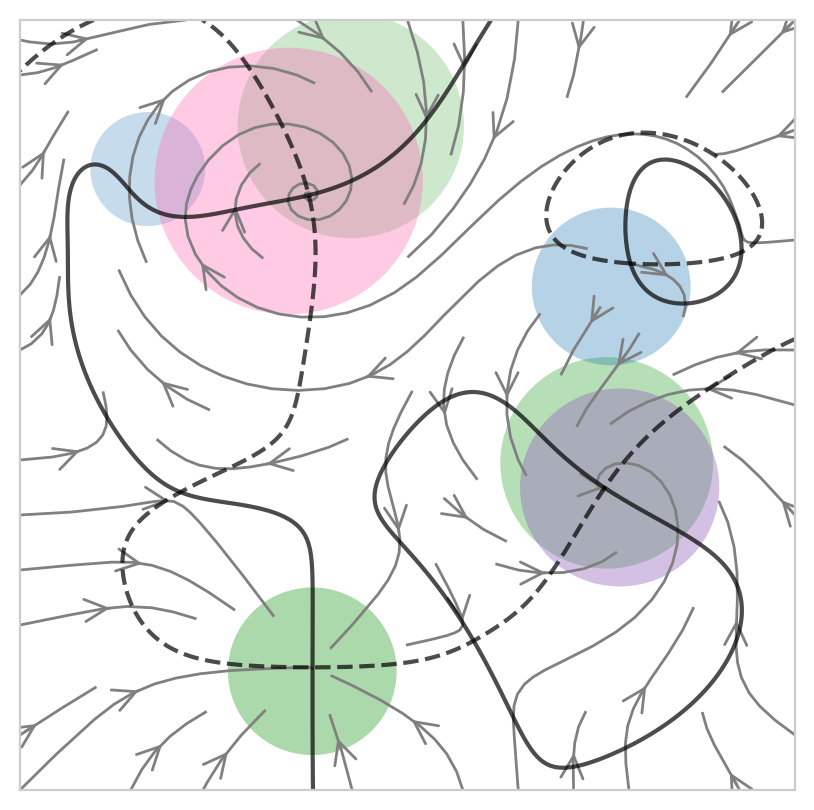

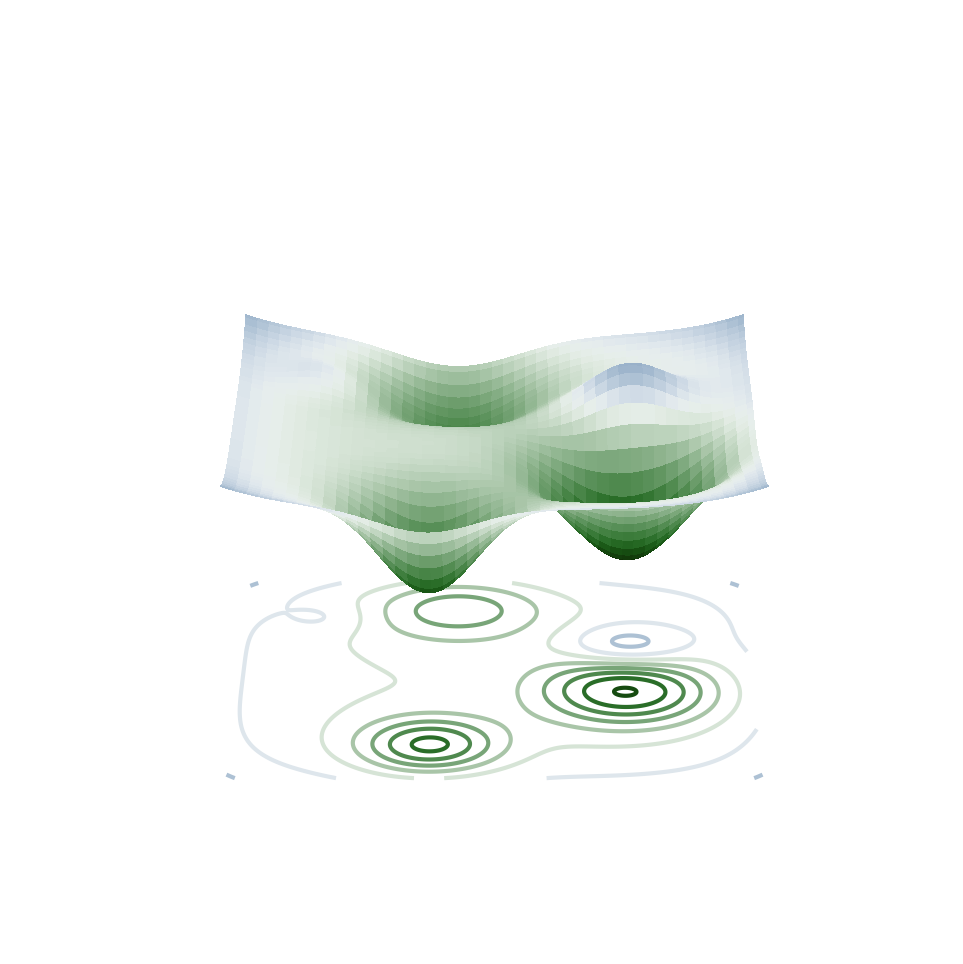

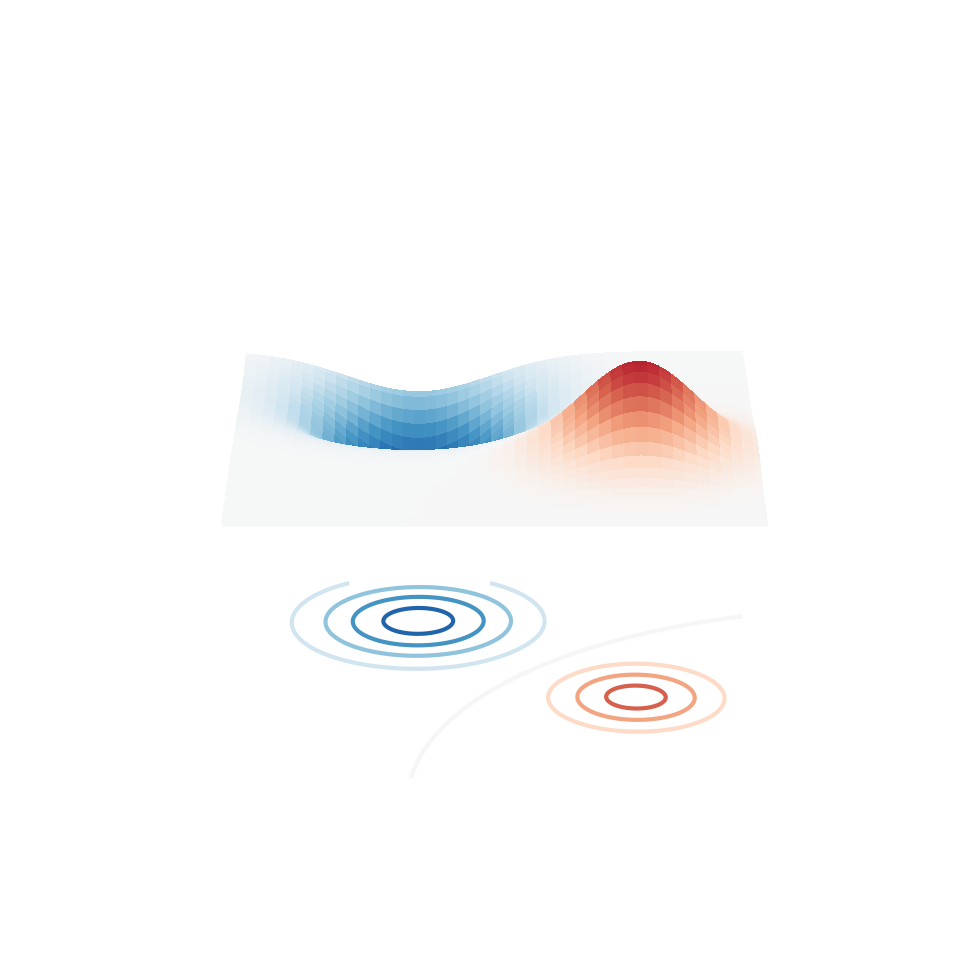

In [19]:
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=0.2, )
ax = plt.gca()
ax.set_axis_off()
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=0, rot=True, offset=3)
ax = plt.gca()
ax.set_axis_off()

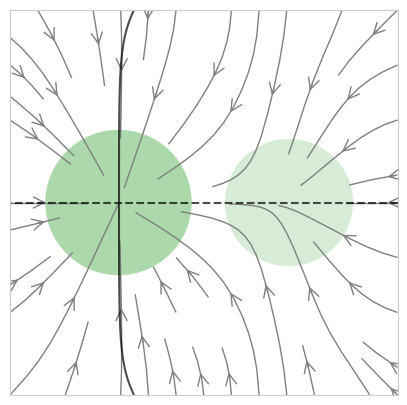

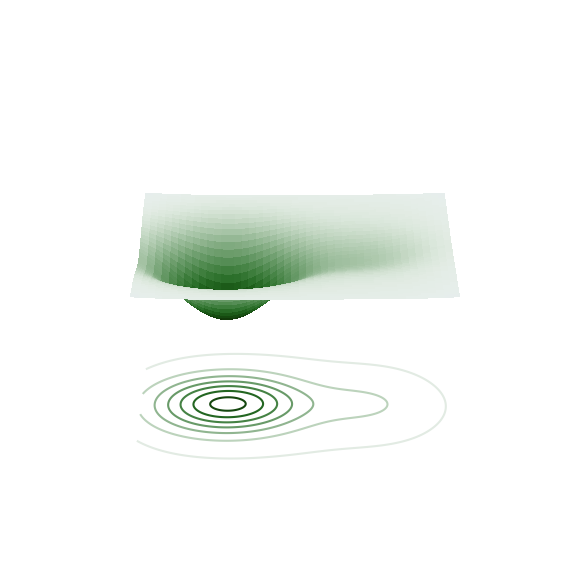

In [47]:
L = 2.5
npoints = 301
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

M1 = Node(x=-1.1, y=0, a=2.5, s=0.8)
M2 = Node(x=+1.1, y=0, a=0.6, s=0.7)   # 0.6 -> 1.2 -> 2.5 

landscape = Landscape([M1, M2], regime=mr.mr_const, A0=0.005)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=None, axes=False)
fig.tight_layout()


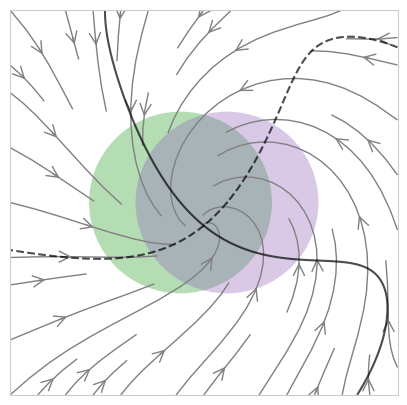

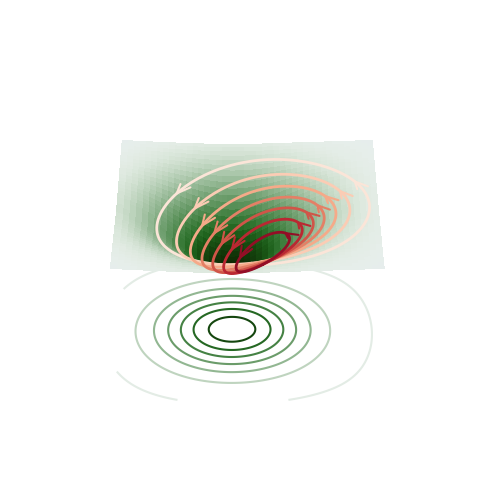

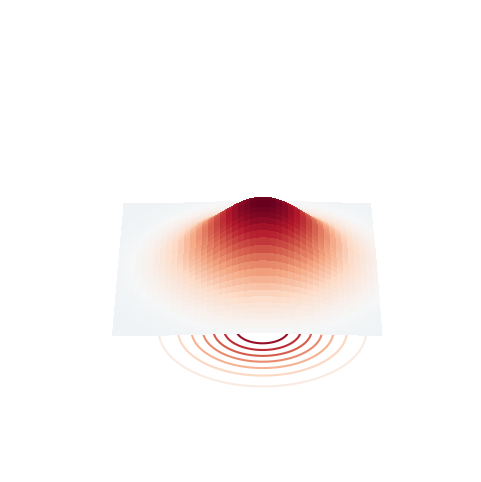

In [67]:
%autoreload
L = 2.5
npoints = 301
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

d = 0.3  # 0.3  -> 1.5
M1 = Node(x=-d, y=0, a=2., s=1)
M2 = Center(x=+d, y=0, a=2., s=1)

landscape = Landscape([M1, M2], regime=mr.mr_const, A0=0.005)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-90, color_scheme='fp_types', cmap_center=None, axes=False, rot_contour=True)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-90, color_scheme='fp_types', cmap_center=None, axes=False, rot=True)



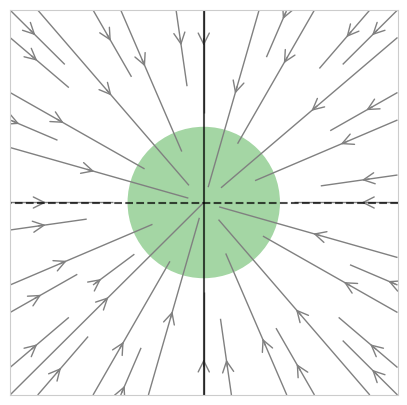

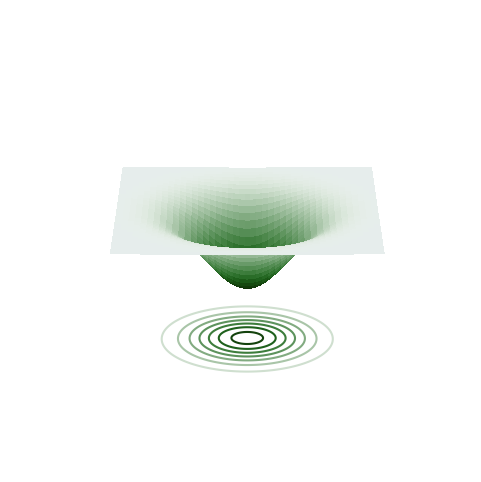

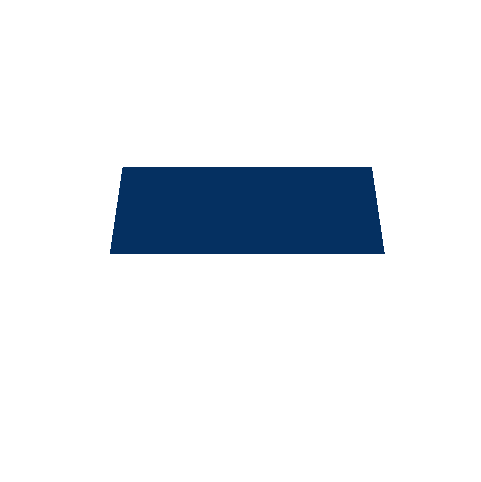

In [94]:
%autoreload
L = 3.
npoints = 301
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

M1 = Node(x=0, y=0, a=3., s=1)
M2 = UnstableNode(x=0, y=0, a=3., s=1)
M3 = Center(x=0, y=0, a=3., s=1)
M4 = NegCenter(x=0, y=0, a=3., s=1)
zlim=(-5,3)

landscape = Landscape([M1,], regime=mr.mr_const, A0=0.0)  # M1 -> M2 -> M3 -> M4 
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=0, axes=False, rot=True, zlim=zlim)



In [414]:
plt.rcParams.update({'figure.dpi': 200}) 
plt.rcParams.update({'font.size': 15})  
plt.rcParams['axes.grid'] = False

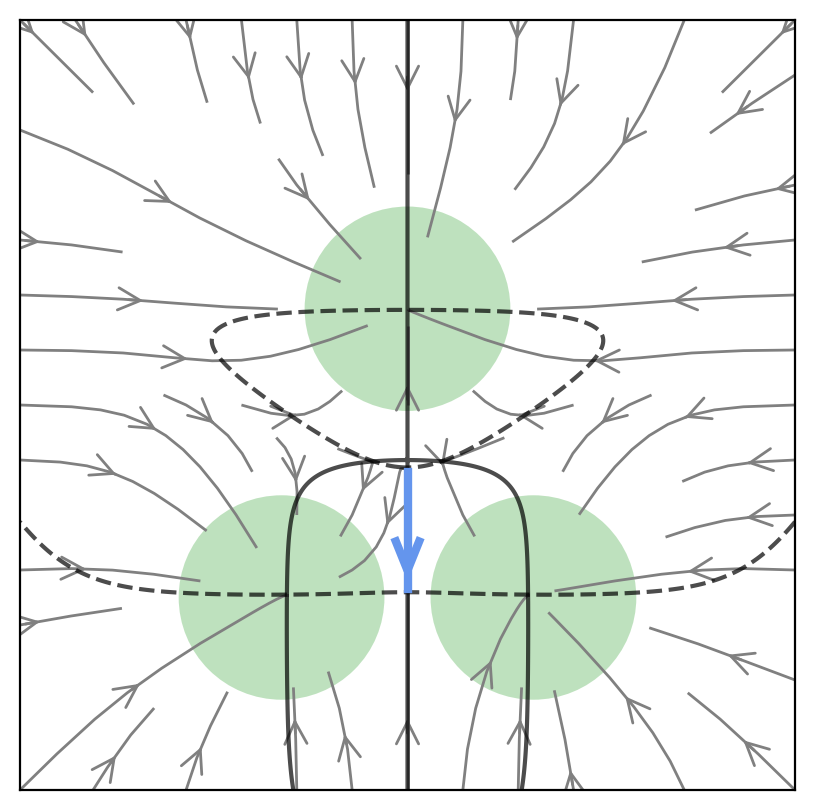

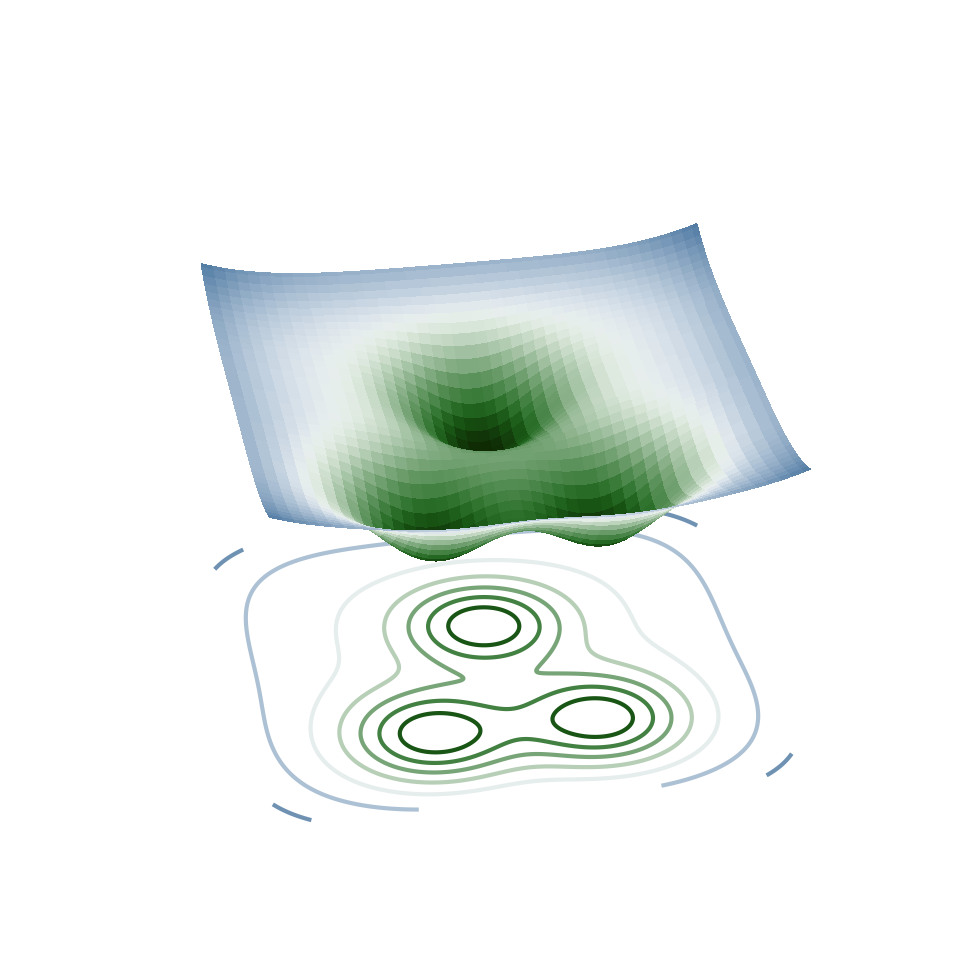

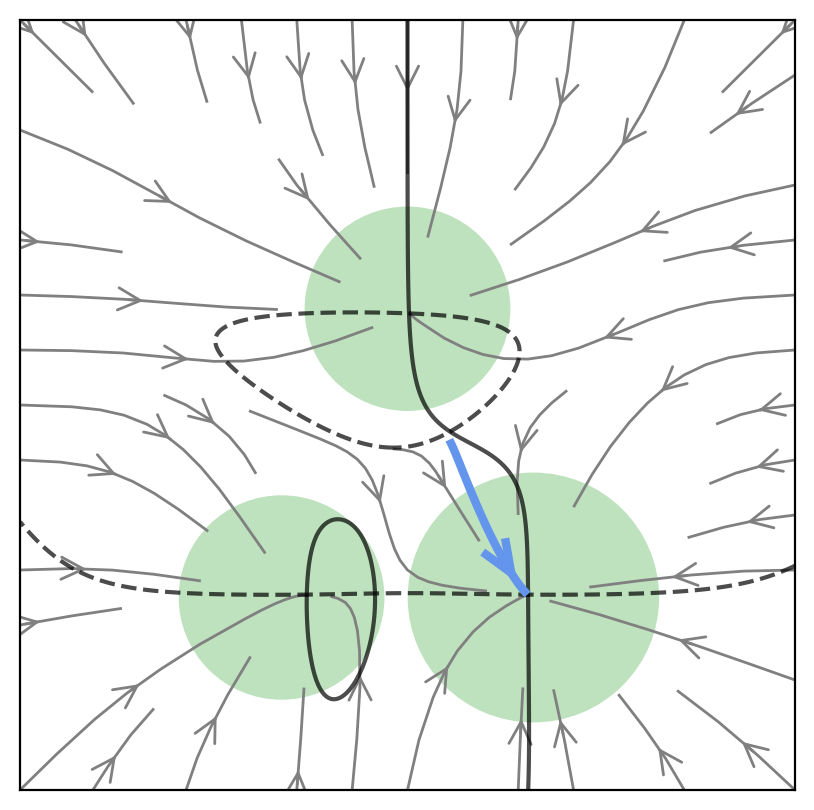

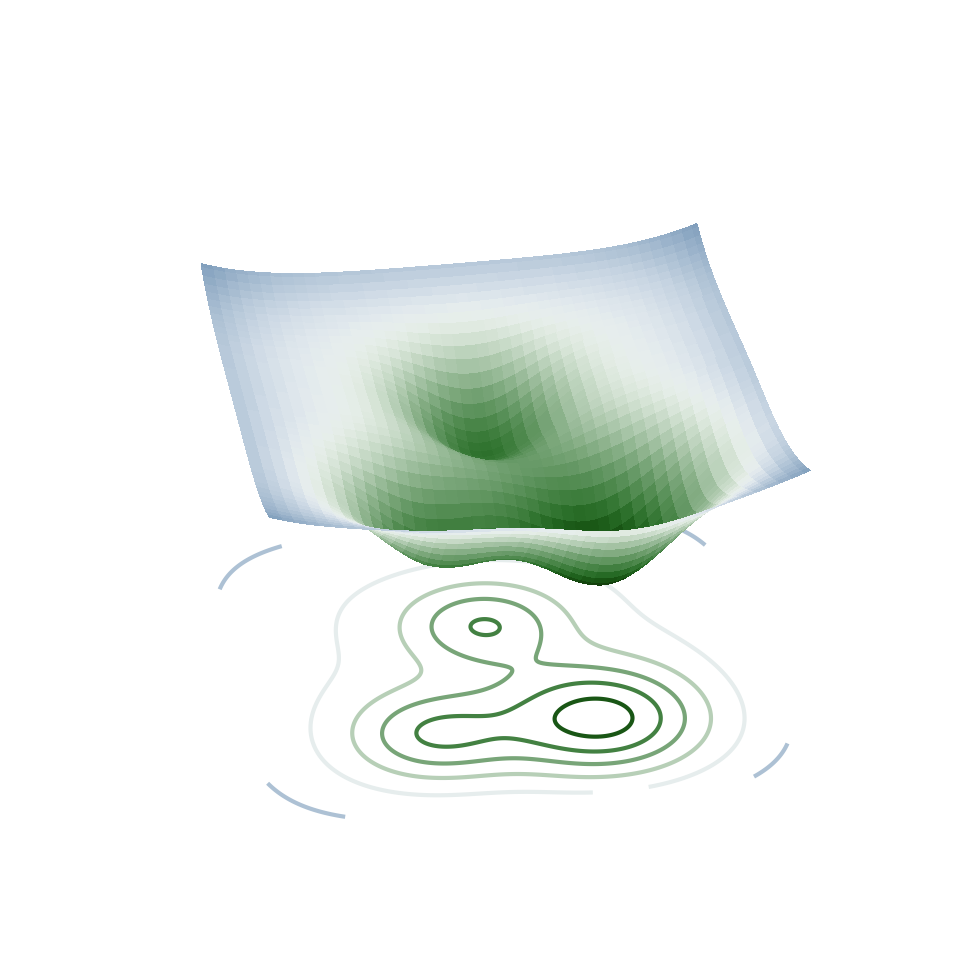

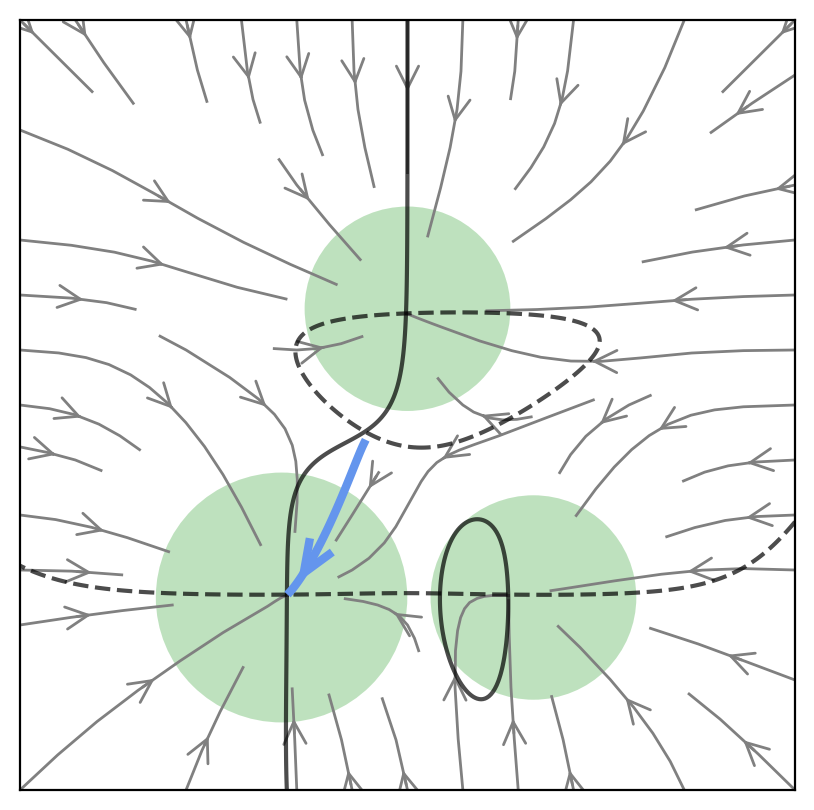

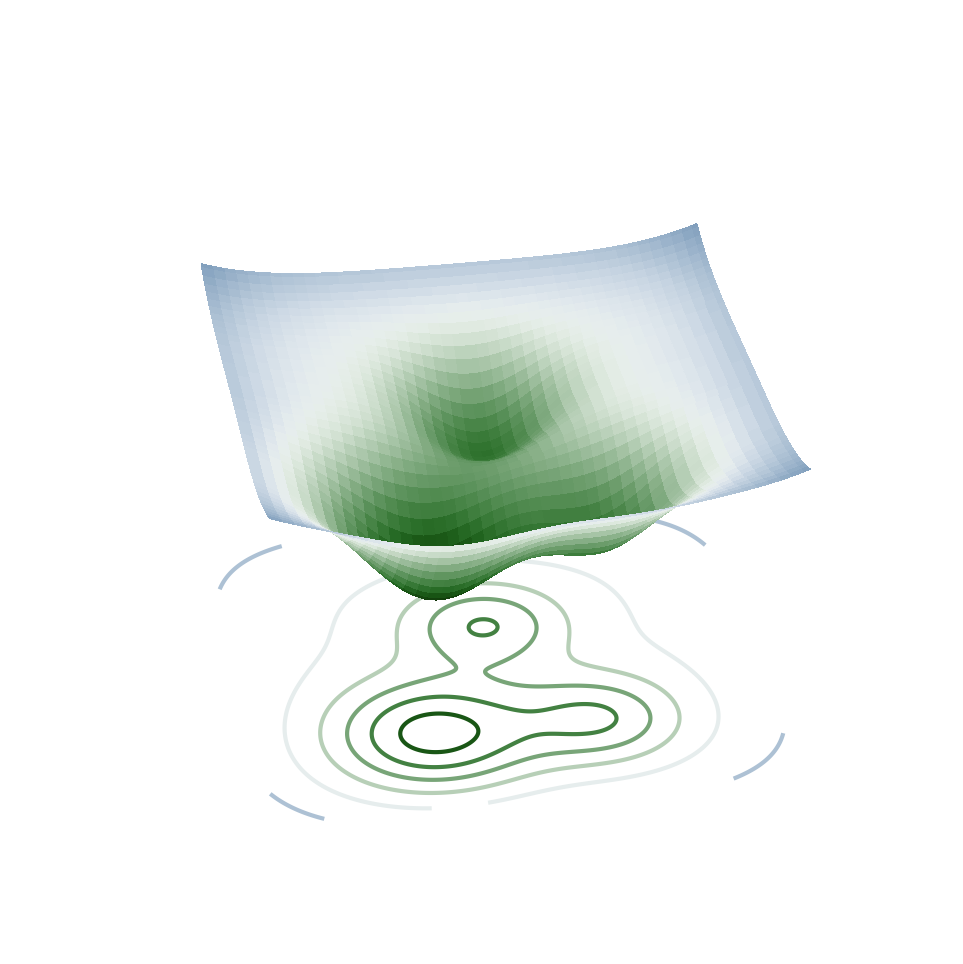

In [544]:
%autoreload
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

d = 1.3
l = 2
M1 = Node(x=-0., y=1., a=1.5, s=0.9)
M2 = Node(x=-d, y=-l, a=1.5, s=0.9)
M3 = Node(x=+d , y=-l, a=1.5, s=0.9)
zlim=(-4,2)
traj_color = 'cornflowerblue'

landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 6., 61), traj_init_cond=(0., -0.7), traj_color=traj_color)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)


M3 = Node(x=+d , y=-l, a=1.5, s=1.1)
landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 4., 45), traj_init_cond=(0.45, -0.4), traj_color=traj_color)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)


M2 = Node(x=-d, y=-l, a=1.5, s=1.1)
M3 = Node(x=+d , y=-l, a=1.5, s=0.9)
landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 4., 45), traj_init_cond=(-0.45, -0.4), traj_color=traj_color)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)

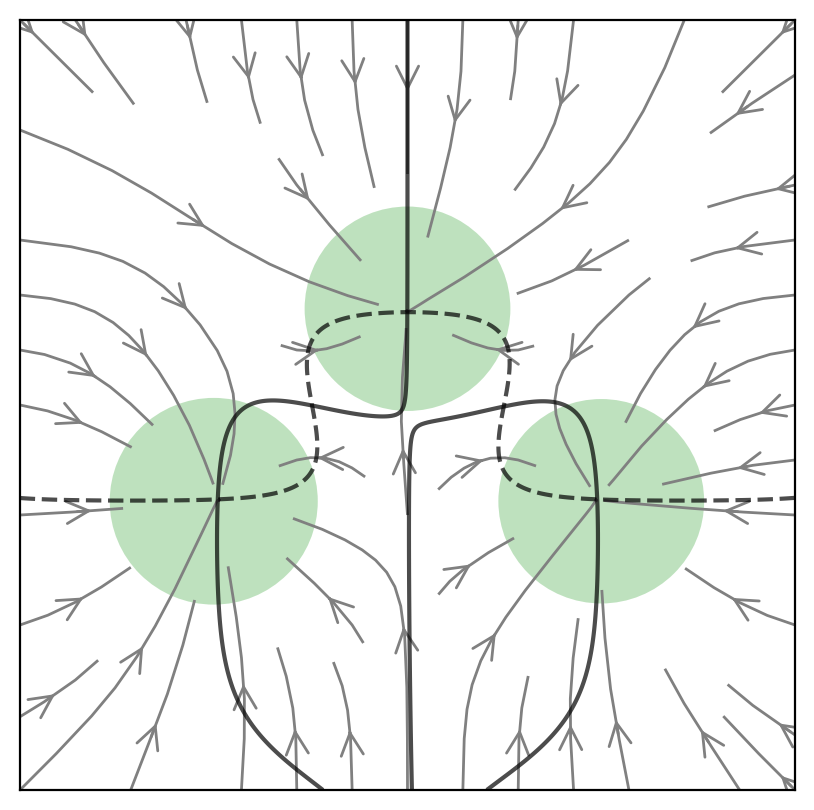

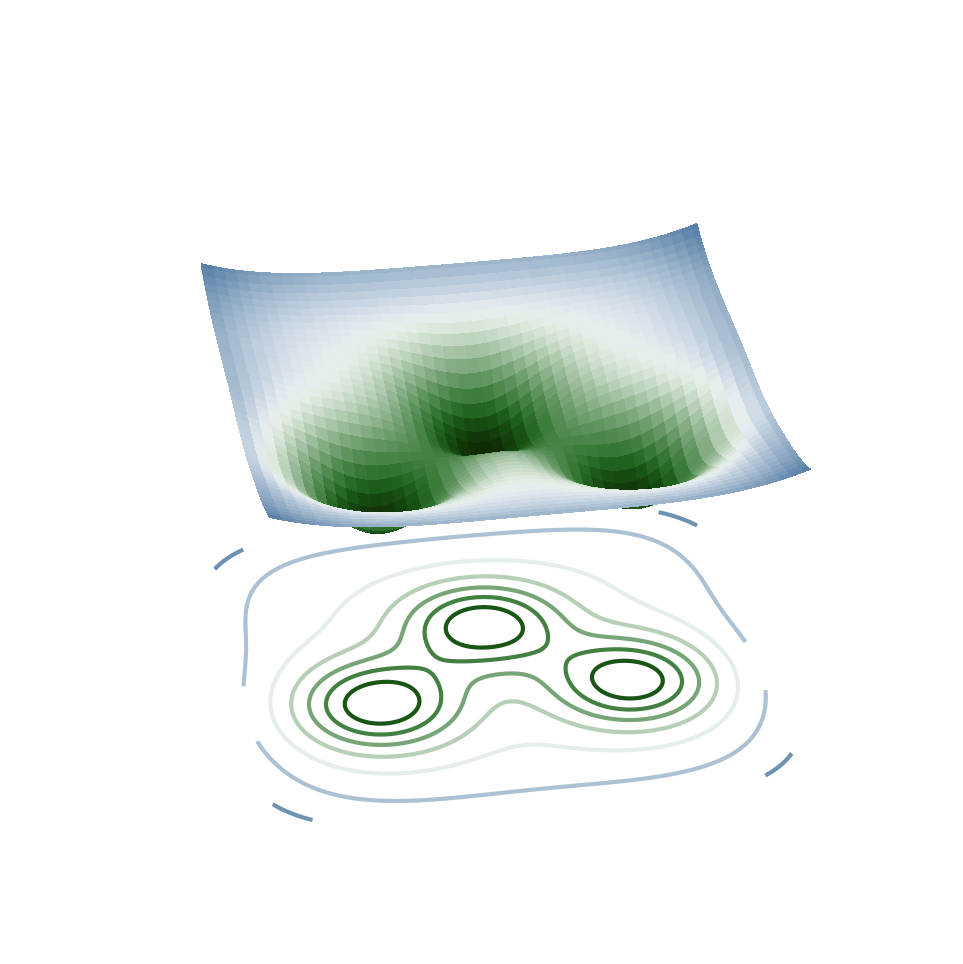

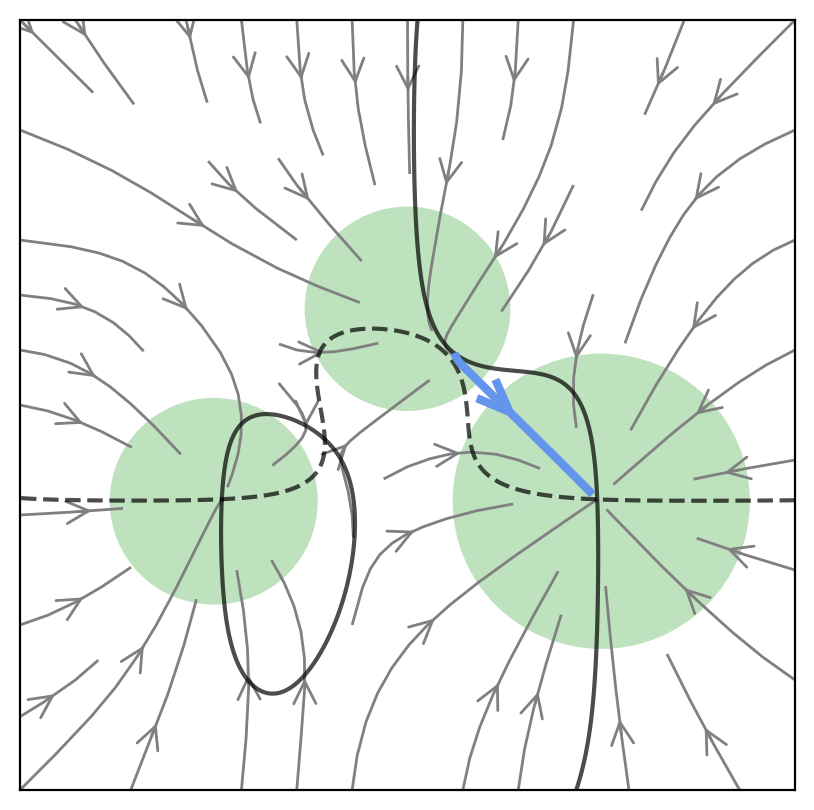

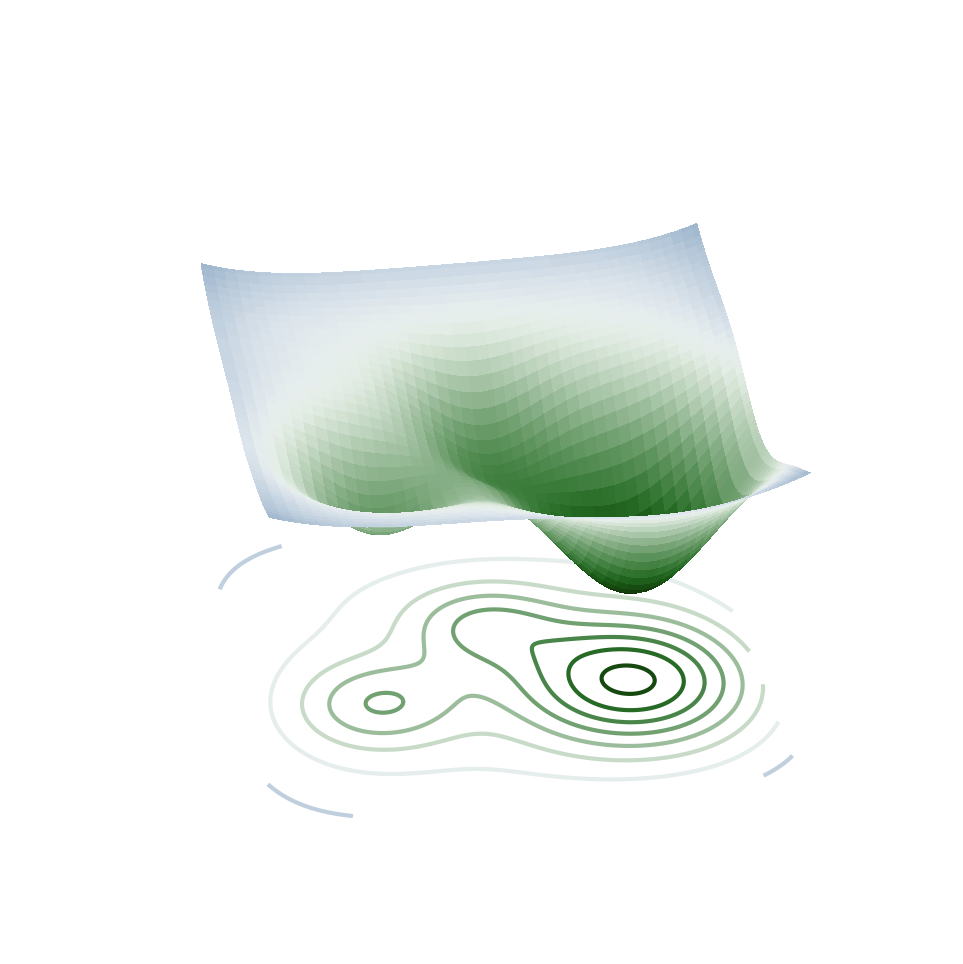

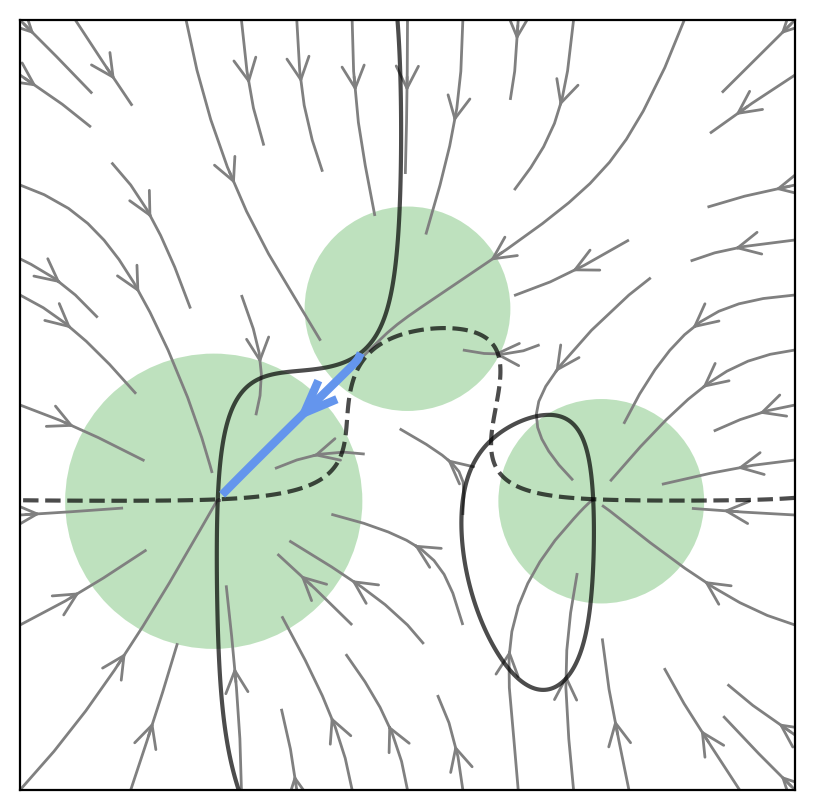

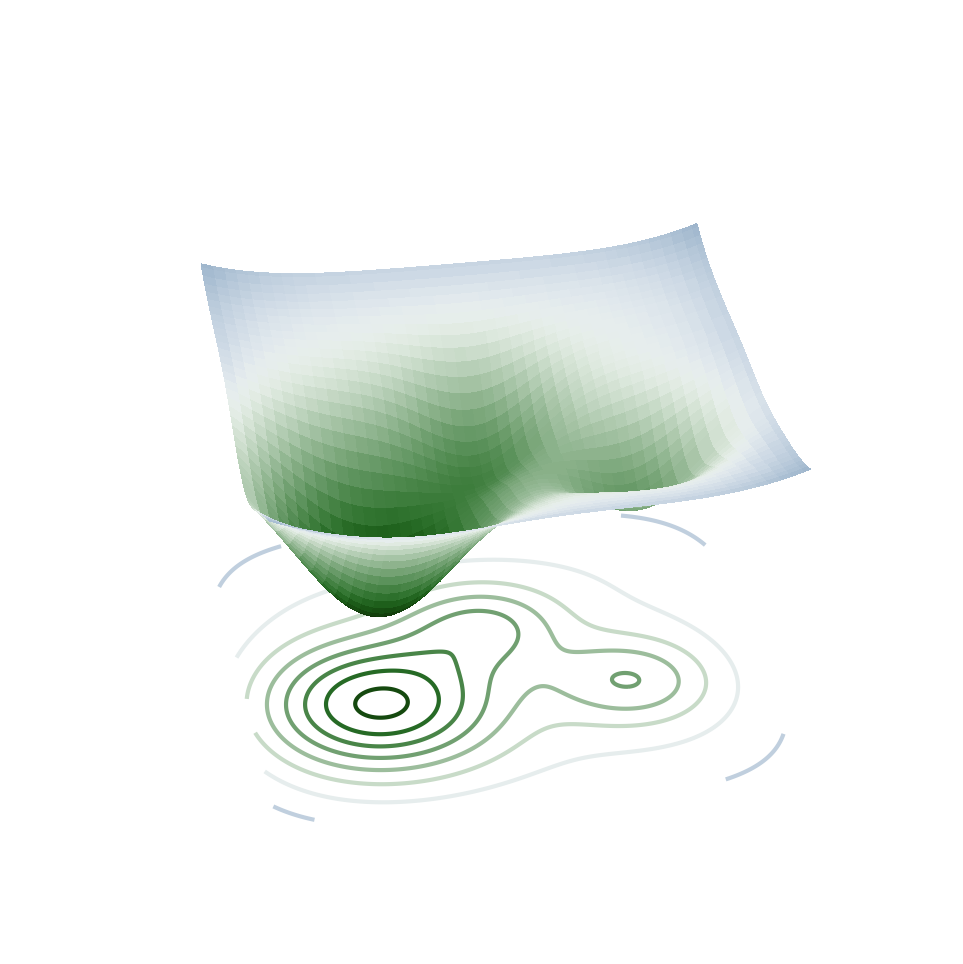

In [546]:
# %autoreload
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

d = 2.
l = 1.
M1 = Node(x=-0., y=1., a=1.5, s=0.9)
M2 = Node(x=-d, y=-l, a=1.5, s=0.91)
M3 = Node(x=+d , y=-l, a=1.5, s=0.9)
zlim=(-4,2)
traj_color = 'cornflowerblue'

landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types',)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)


M3 = Node(x=+d , y=-l, a=1.5, s=1.3)
landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 6.5, 65), traj_init_cond=(0.5, 0.5), traj_color=traj_color)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)


M2 = Node(x=-d, y=-l, a=1.5, s=1.3)
M3 = Node(x=+d , y=-l, a=1.5, s=0.9)
landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 6.5, 65), traj_init_cond=(-0.5, 0.5), traj_color=traj_color)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)


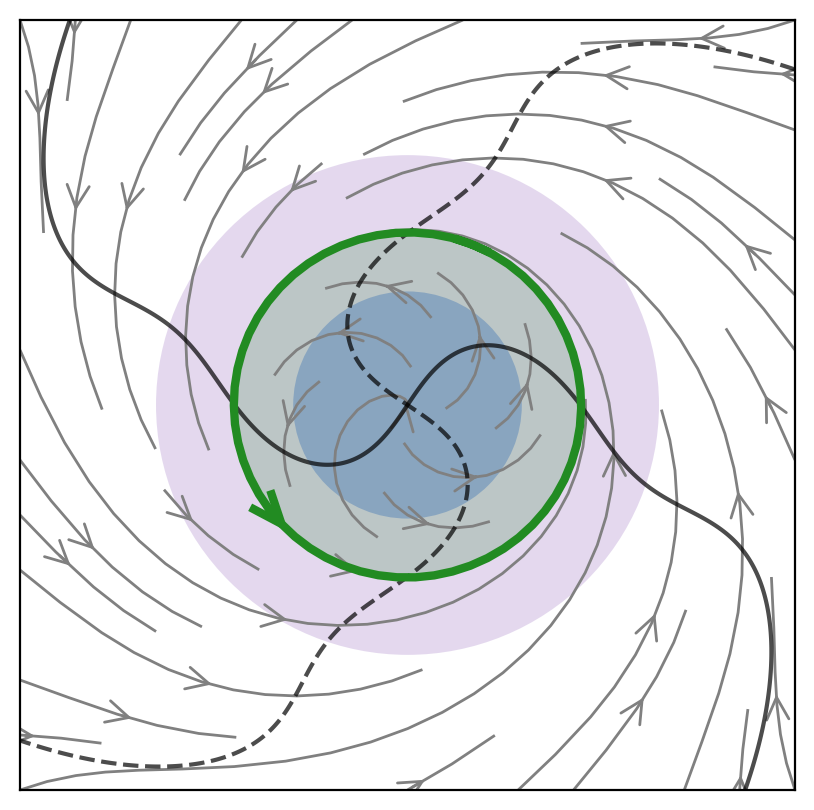

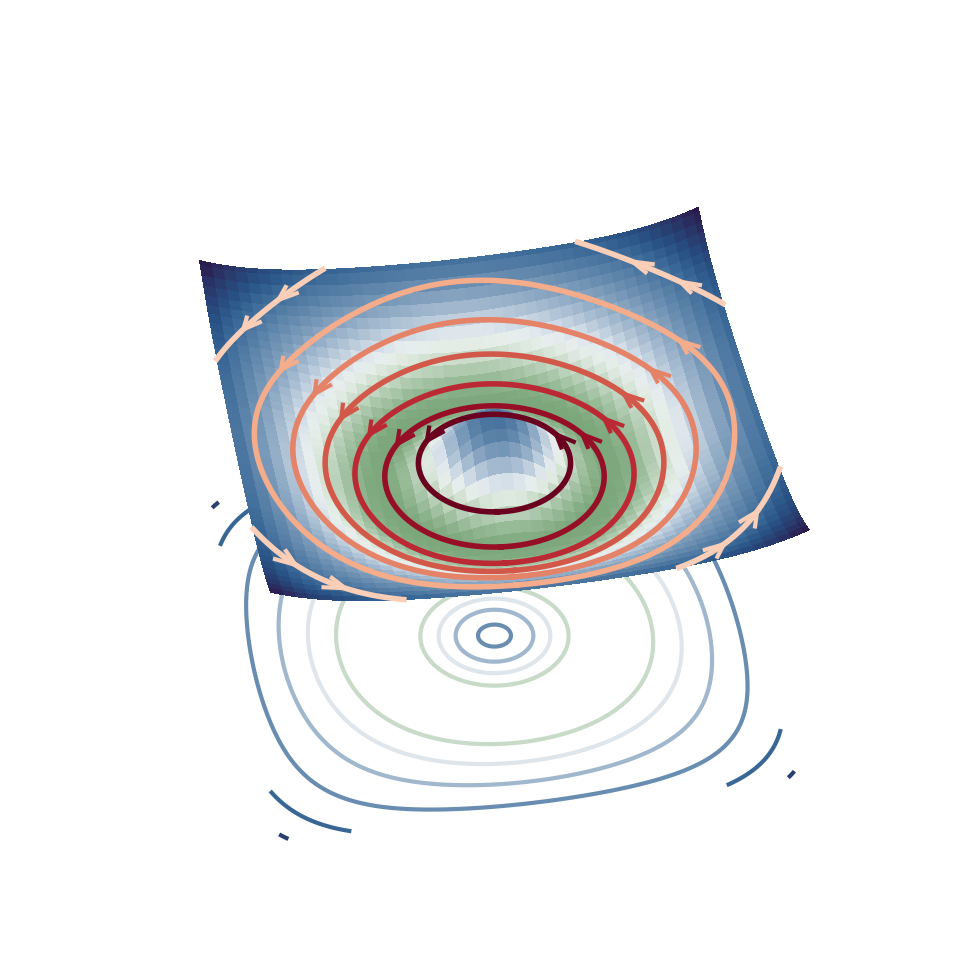

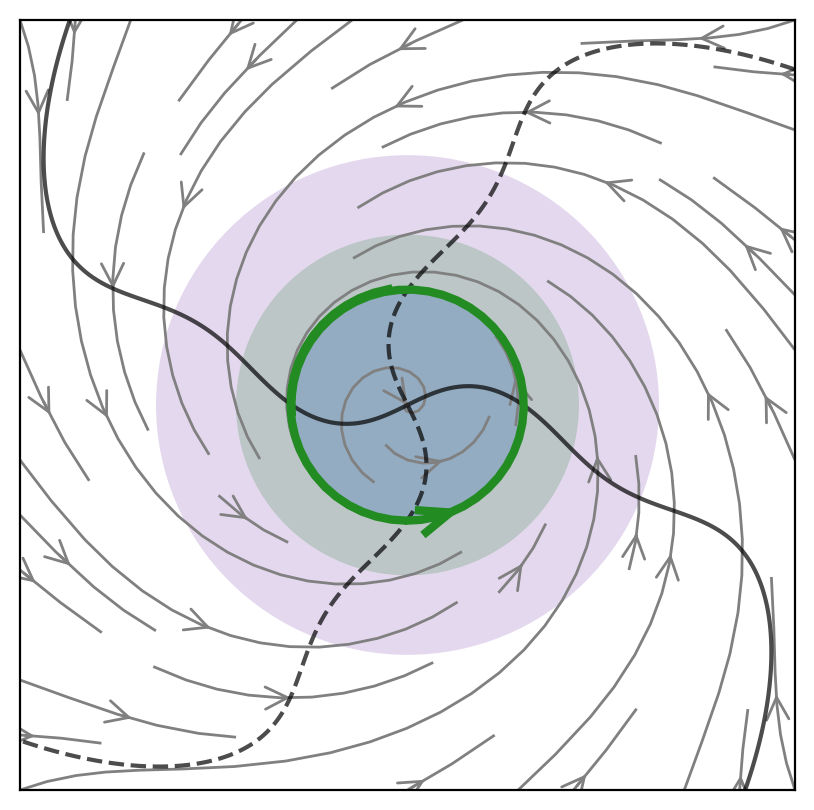

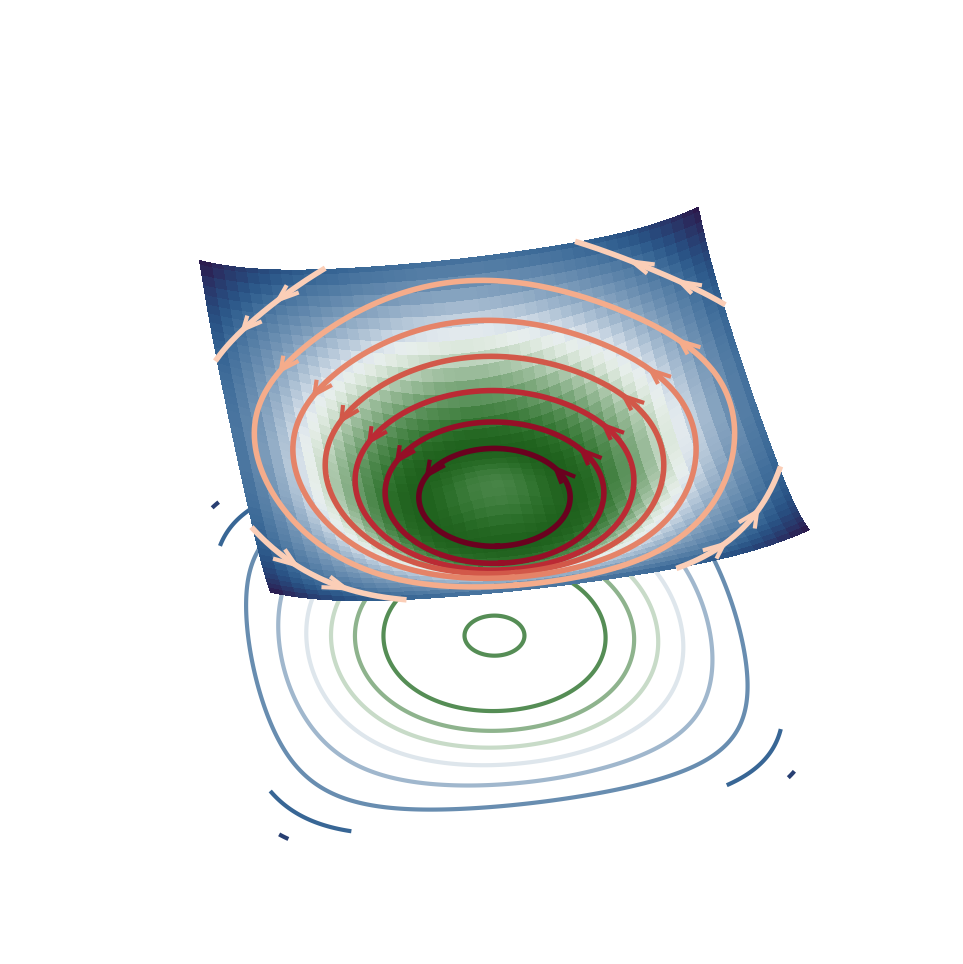

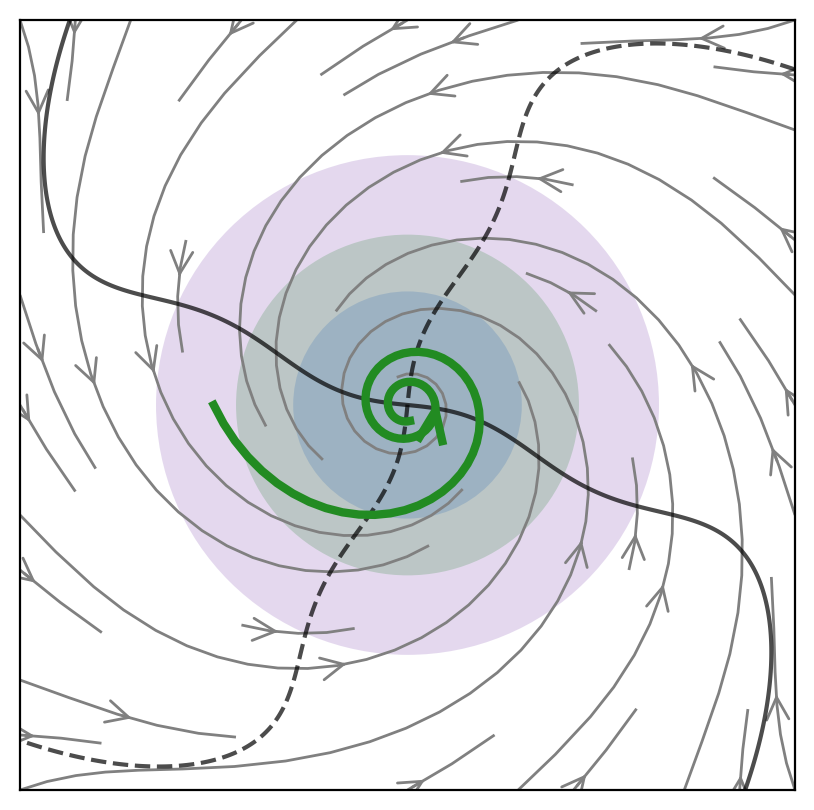

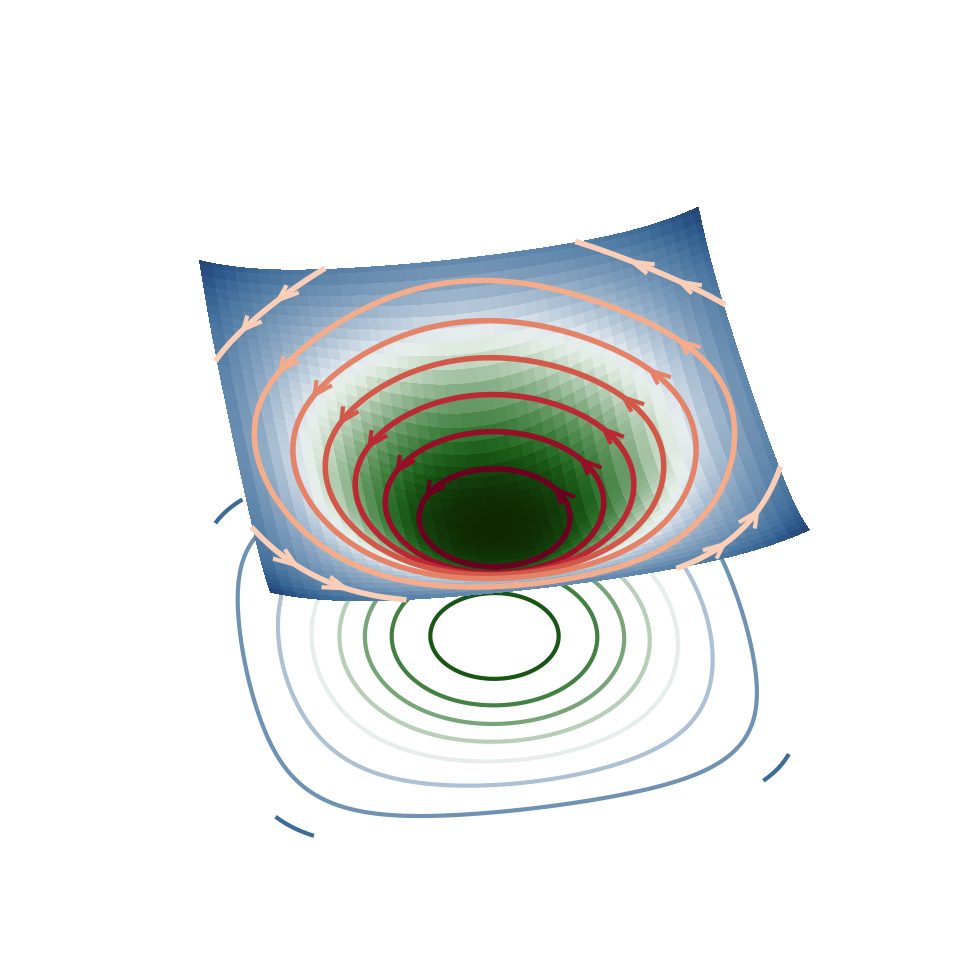

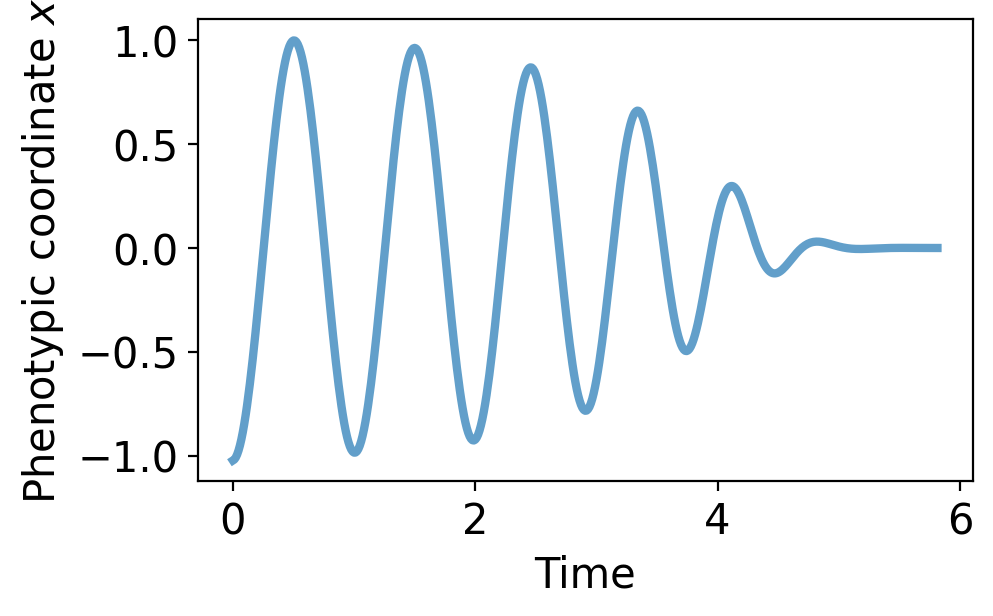

In [418]:
%autoreload
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
zlim=(-3,2)

M1 = Node(0., 0., 1., 1.5, tau=1.)
M3 = Center(0., 0., 1., 2.2, tau=1.)

for a in (2.5, 1.5, 0.9):
    M2 = UnstableNode(0., 0., a, 1., tau=1.)
    landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
    traj_start=40
    if a < 1:
        traj_start = 0
    fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 15, 101), traj_init_cond=(-2, 0.), traj_color='forestgreen', traj_start=traj_start)
    fig = visualize_potential(landscape, xx, yy, 0, elev=40, azim=-100, color_scheme='fp_types', cmap_center=-0.25, axes=False, zlim=zlim, rot_contour=True, min_contour_segment=120)
    
tau = 8.
M1 = Node(0., 0., 1.*np.ones(2), 1.5*np.ones(2), tau=tau)
M3 = Center(0., 0., 1.*np.ones(2), 2.2*np.ones(2), tau=tau)
M2 = UnstableNode(0., 0., (2.5, 0.), 1.*np.ones(2), tau=tau)
landscape = Landscape([M1, M2, M3], regime=mr.mr_sigmoid, A0=0.005)
landscape.init_cells(1, (-1.8, 0.))
tt = (-30, 20, 501)
traj, states = landscape.run_cells(*tt)
# plt.plot(traj[0, 0], traj[1, 0], lw=3)
plt.figure(figsize=(5,3))
x = traj[0,0]
T = np.argmin(np.abs(np.diff(x)[:120])) - np.argmin(np.abs(np.diff(x)[:30]))
plt.plot(np.linspace(0, 500, 501)/T, x/np.max(x), lw=3, alpha=0.7)
plt.ylabel(r'Phenotypic coordinate $x$')
plt.xlabel('Time')
plt.show()

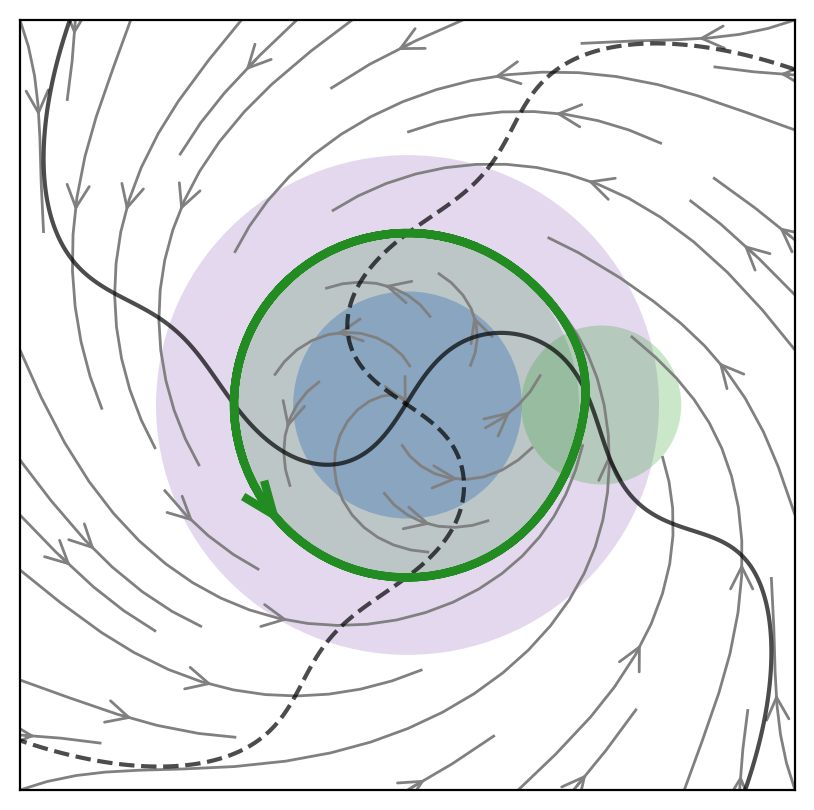

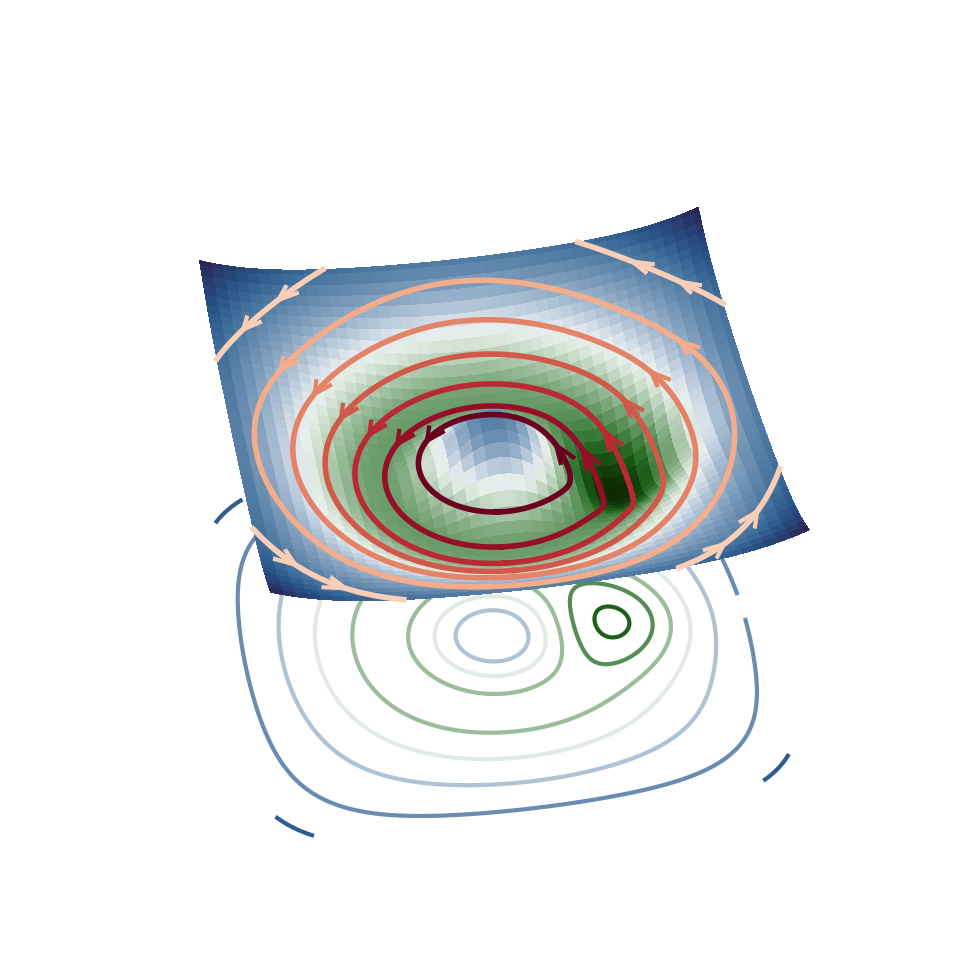

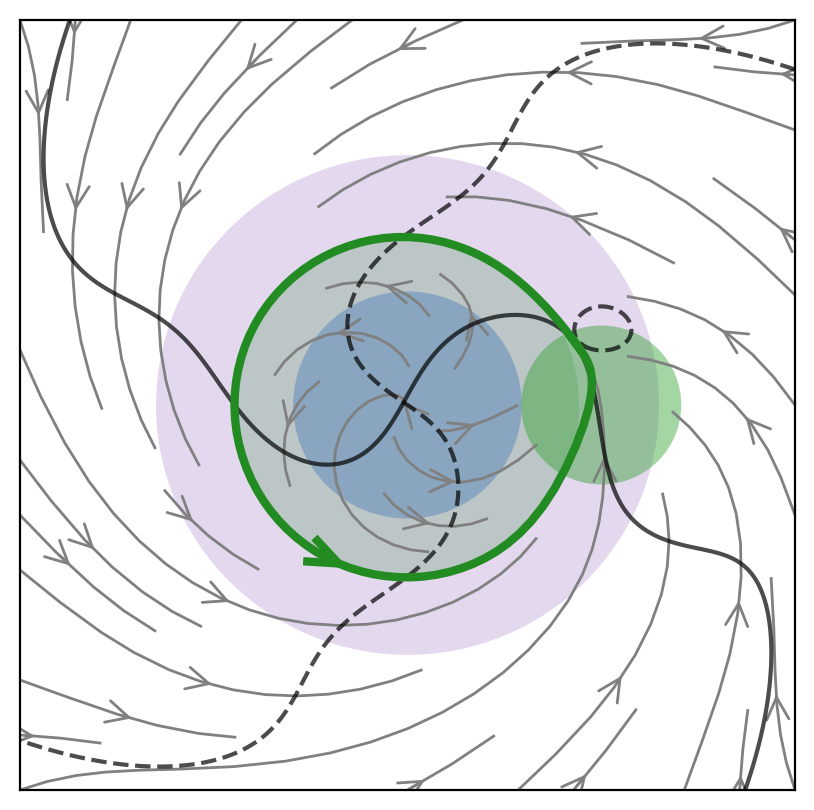

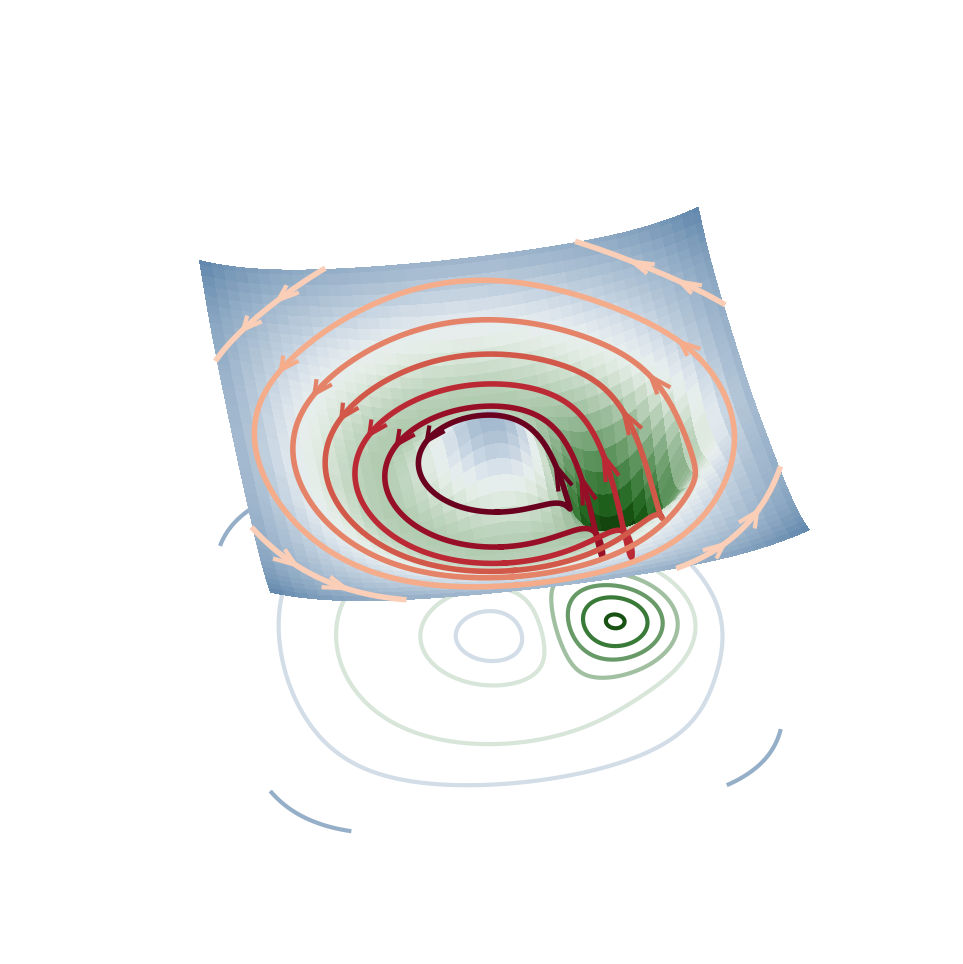

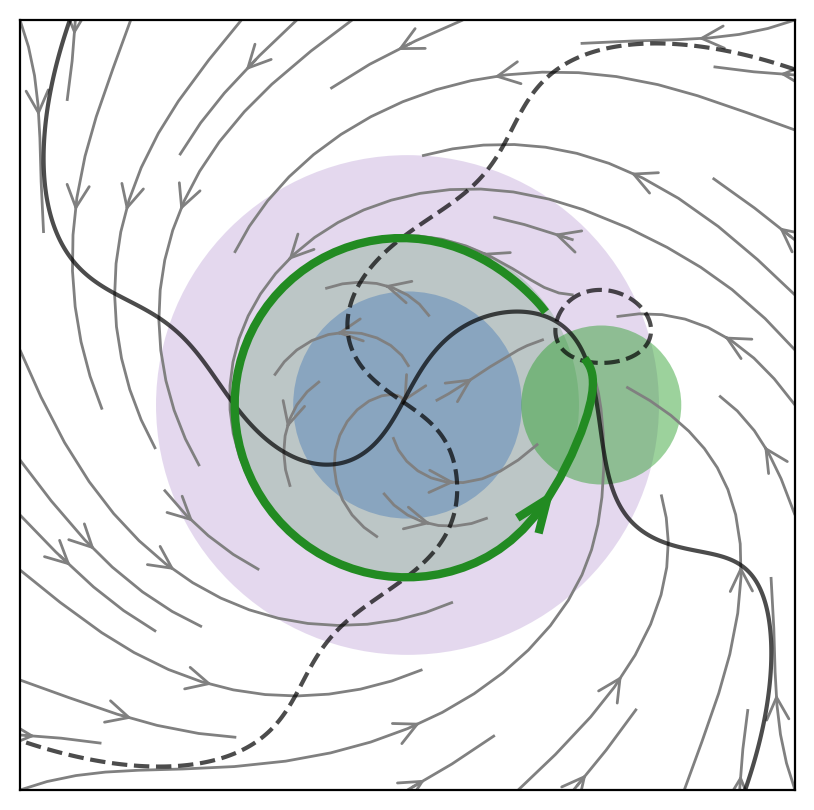

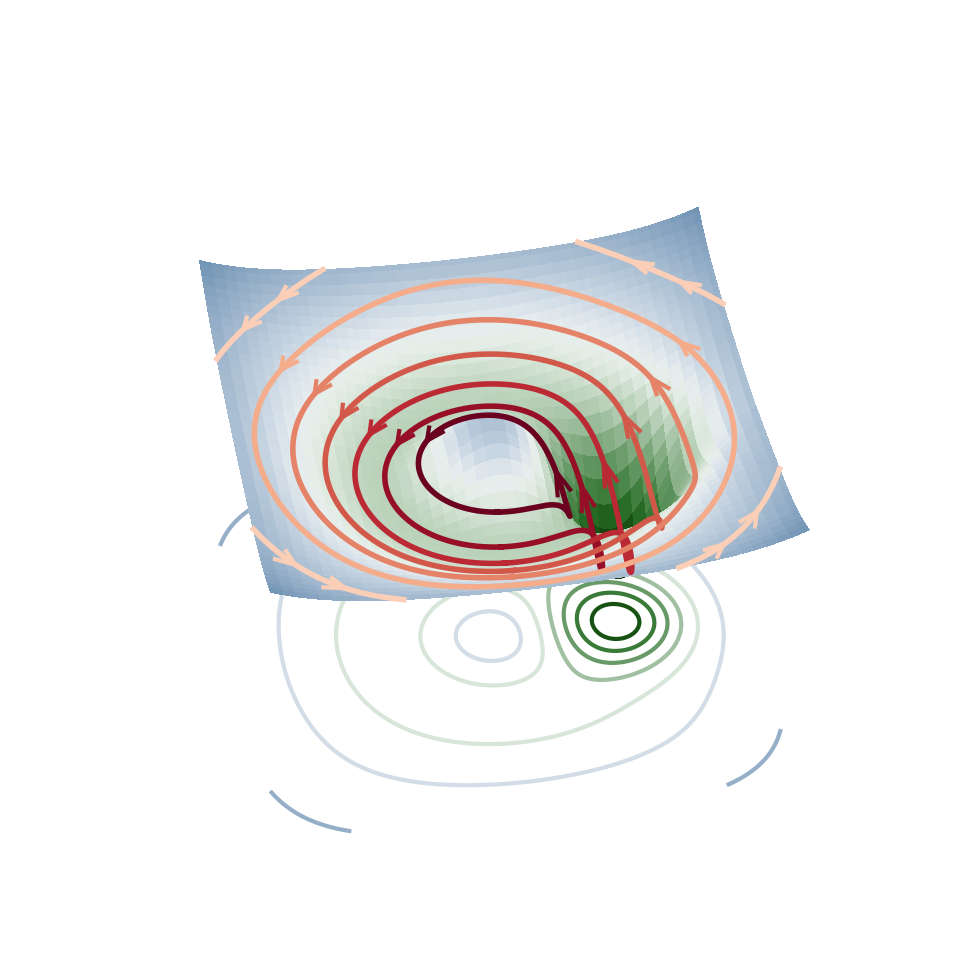

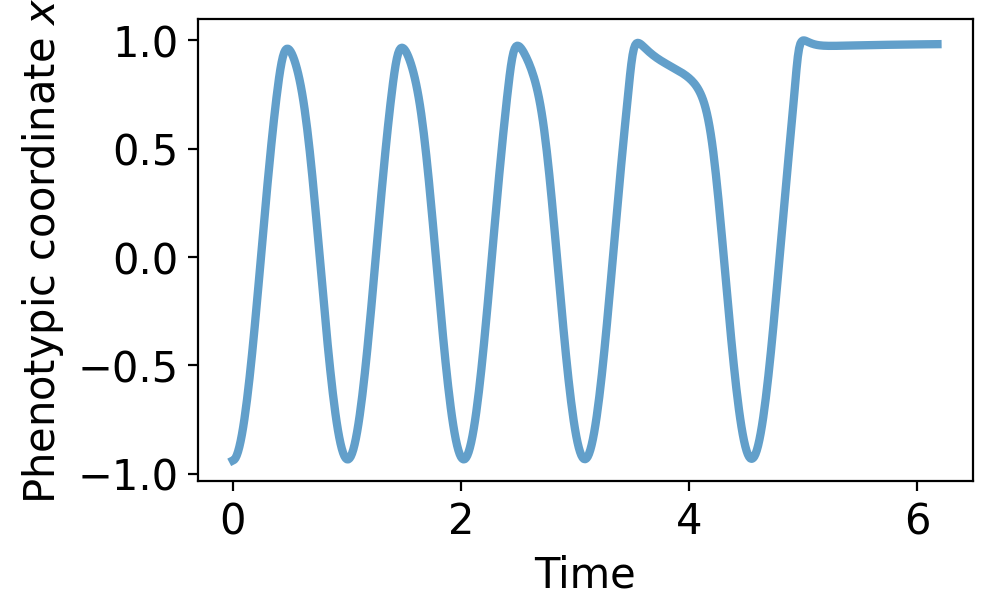

In [547]:
# %autoreload
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
zlim=(-3,2)

M1 = Node(0., 0., 1., 1.5, tau=1.)
M3 = Center(0., 0., 1., 2.2, tau=1.)
M2 = UnstableNode(0., 0., 2.5, 1., tau=1.)

for a in (1., 3., 3.5):
# for a in (4.,):
    M4 = Node(2., 0., a, 0.7)
    landscape = Landscape([M1, M2, M3, M4], regime=mr.mr_const, A0=0.005)
    traj_start=40
    init_cond=(0,-1.8)
    times = (0., 25., 251)
    if a > 3:
        traj_start = 0
        init_cond=(1.4, 1.)
        times = (0, 11, 111)
    fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=times, traj_init_cond=init_cond, traj_color='forestgreen', traj_start=traj_start)
    fig = visualize_potential(landscape, xx, yy, 0, elev=40, azim=-100, color_scheme='fp_types', cmap_center=-0.2, axes=False, zlim=zlim, rot_contour=True, min_contour_segment=120)
    
# fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 10, 151), traj_init_cond=(1.3, 1.1), traj_color='forestgreen', traj_start=traj_start)
# landscape.init_cells(1, (1.3, 1.2))
# tt = (0, 25, 251)
# traj, states = landscape.run_cells(*tt)
# plt.figure()
# plt.plot(traj[0, 0], traj[1, 0], lw=3)
# plt.show()
# plt.figure(figsize=(5,3))
# x = traj[0,0]
# # T = np.argmin(np.abs(np.diff(x)[80:150]))+80 #- np.argmin(np.abs(np.diff(x)[:10]))
# # plt.vlines(np.argmin(np.abs(np.diff(x)[80:150]))+80, -1, 1)
# plt.plot(np.linspace(0, 25, 251), x/np.max(x), lw=3, alpha=0.7)
# plt.ylabel(r'Phenotypic coordinate $x$')
# plt.xlabel('Time')
# plt.show()
    
tau = 8.
M1 = Node(0., 0., 1., 1.5, tau=tau)
M3 = Center(0., 0., 1., 2.2, tau=tau)
M2 = UnstableNode(0., 0., 2.5, 1., tau=tau)
M4 = Node(2., 0., (1., 4.), 0.7*np.ones(2), tau=tau)
# 
# 
landscape = Landscape([M1, M2, M3, M4], regime=mr.mr_sigmoid, A0=0.005)
landscape.init_cells(1, (-1.8, 0.))
tt = (-30, 25, 551)
traj, states = landscape.run_cells(*tt)
# plt.plot(traj[0, 0], traj[1, 0], lw=3)
plt.figure(figsize=(5,3))
x = traj[0,0]
T = np.argmin(np.abs(np.diff(x)[80:150]))+80 #- np.argmin(np.abs(np.diff(x)[:10]))
# plt.vlines(np.argmin(np.abs(np.diff(x)[80:150]))+80, -1, 1)
plt.plot(np.linspace(0, 550, 551)/T, x/np.max(x), lw=3, alpha=0.7)
plt.ylabel(r'Phenotypic coordinate $x$')
plt.xlabel('Time')
plt.show()




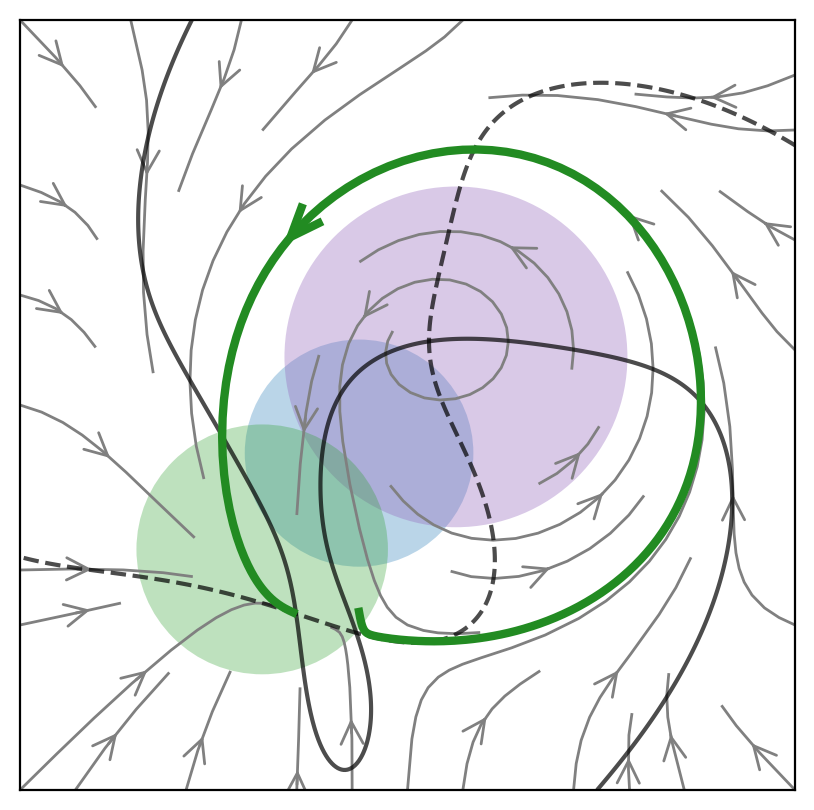

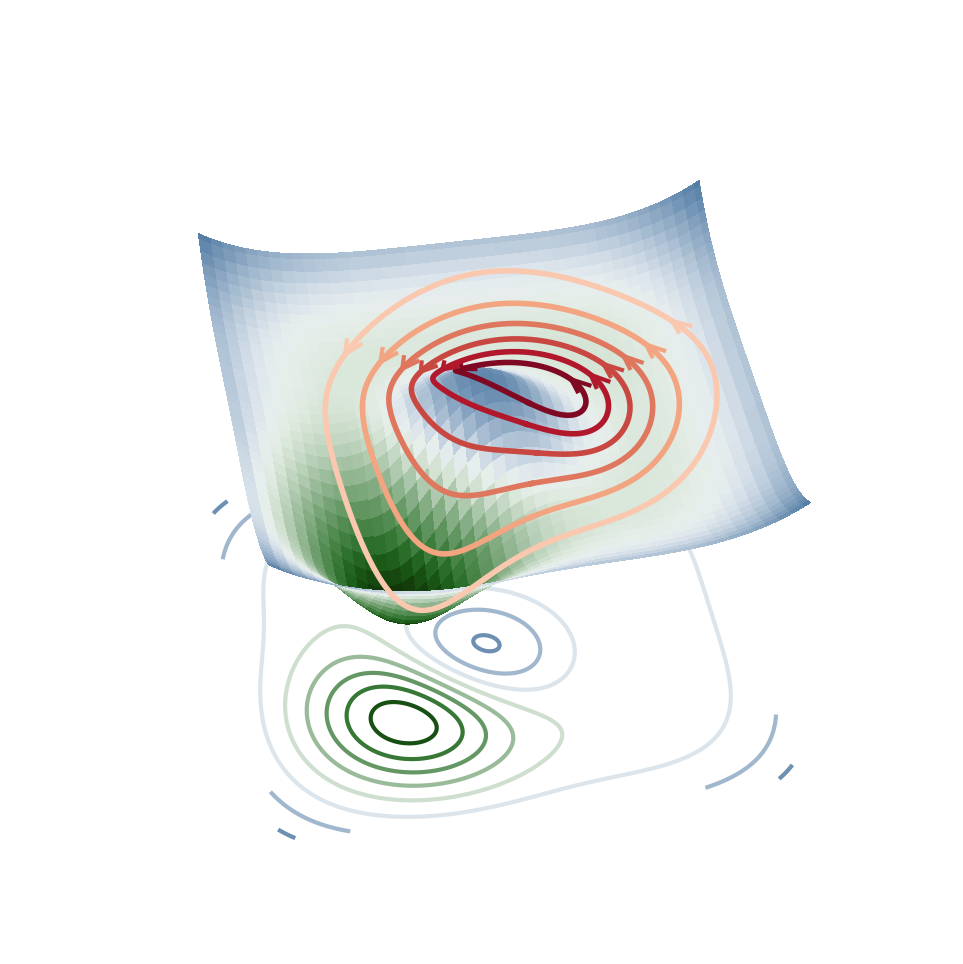

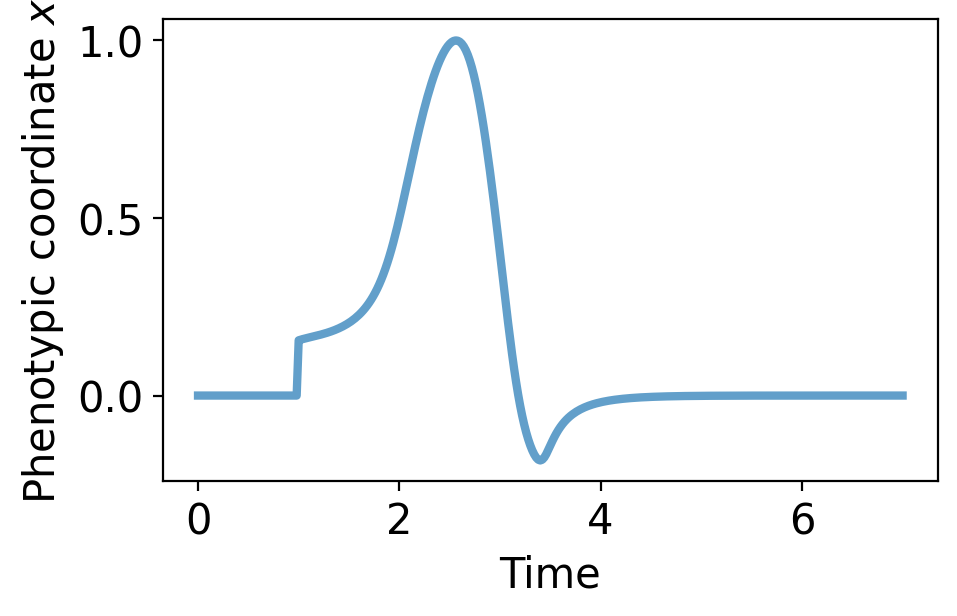

-2.1683194600827975


In [543]:
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
zlim=(-3,2)

# M1 = Node(0., 0., 1., 1.5, tau=1.)
M3 = Center(0.5, 0.5, 2., 1.5, tau=1.)
M2 = UnstableNode(-0.5, -0.5, 1.5, 1., tau=1.)
M4 = Node(-1.5, -1.5, 1.5, 1.1)

landscape = Landscape([M2, M3, M4], regime=mr.mr_const, A0=0.008)
traj_start=0
init_cond=(-0.5, -2.15)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 22, 221), traj_init_cond=init_cond, traj_color='forestgreen', traj_start=traj_start)
fig = visualize_potential(landscape, xx, yy, 0, elev=40, azim=-100, color_scheme='fp_types', cmap_center=0.2, axes=False, zlim=zlim, rot_contour=True, min_contour_segment=250)


landscape.init_cells(1, init_cond)
tt = (0, 40, 301)
traj, states = landscape.run_cells(*tt)
# plt.figure()
# plt.plot(traj[0, 0], traj[1, 0], lw=3)
# plt.show()
plt.figure(figsize=(5,3))
x = np.zeros(351)
x[:50] = traj[0, 0, -1]
x[50:] = traj[0,0]

# T = np.argmin(np.abs(np.diff(x)[80:150]))+80 #- np.argmin(np.abs(np.diff(x)[:10]))
# plt.vlines(np.argmin(np.abs(np.diff(x)[80:150]))+80, -1, 1)
plt.plot(np.linspace(0, 35, 351)/5., ((x-x[-1])/np.max(x-x[-1]))[:], lw=3, alpha=0.7)
# plt.plot(np.linspace(0, 5, 50), ((x-x[-1])/np.max(x-x[-1]))[:50], lw=3, alpha=0.7, c='tab:blue')

plt.ylabel(r'Phenotypic coordinate $x$')
plt.xlabel('Time')
plt.show()

print(traj[1, 0, -1])

